In [1]:
# Um sistema gráfico completo, alternativo ao sistema básico de gráficos do R.
# Oferece mais opções de modificação, legendas prontas e formatação mais sólida.

# https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf
# https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

In [35]:
# Instalando e carregando o pacote
#install.packages("ggplot2")
library(ggplot2)

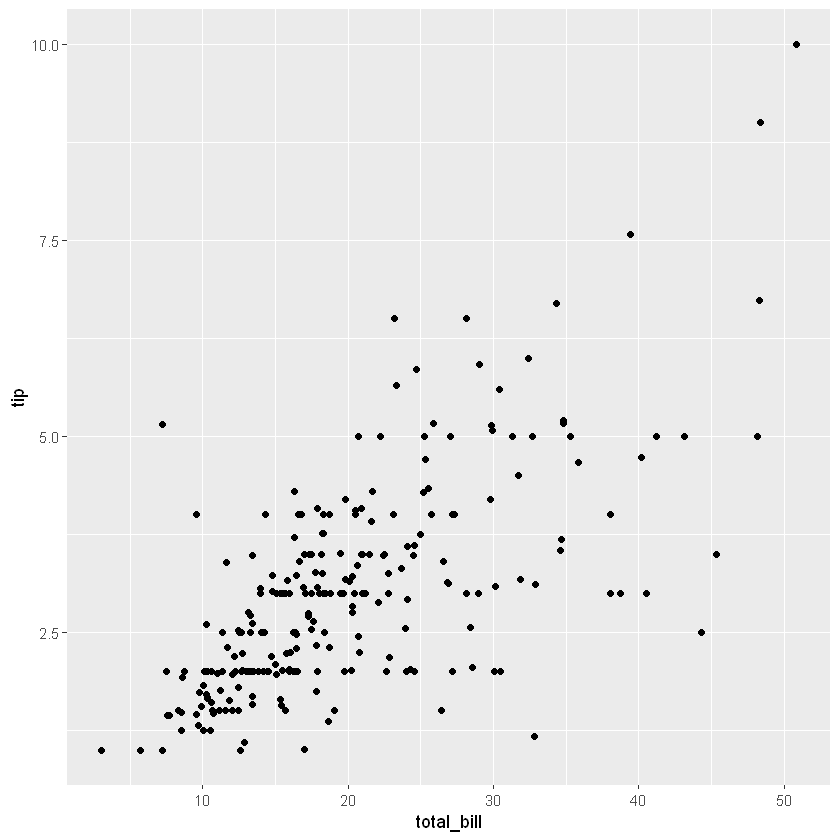

In [36]:
# Plotando um gráfico básico com qplot()
data(tips, package = 'reshape2')
#View(tips)
qplot(total_bill, tip, data = tips, geom = "point")

starting httpd help server ... done


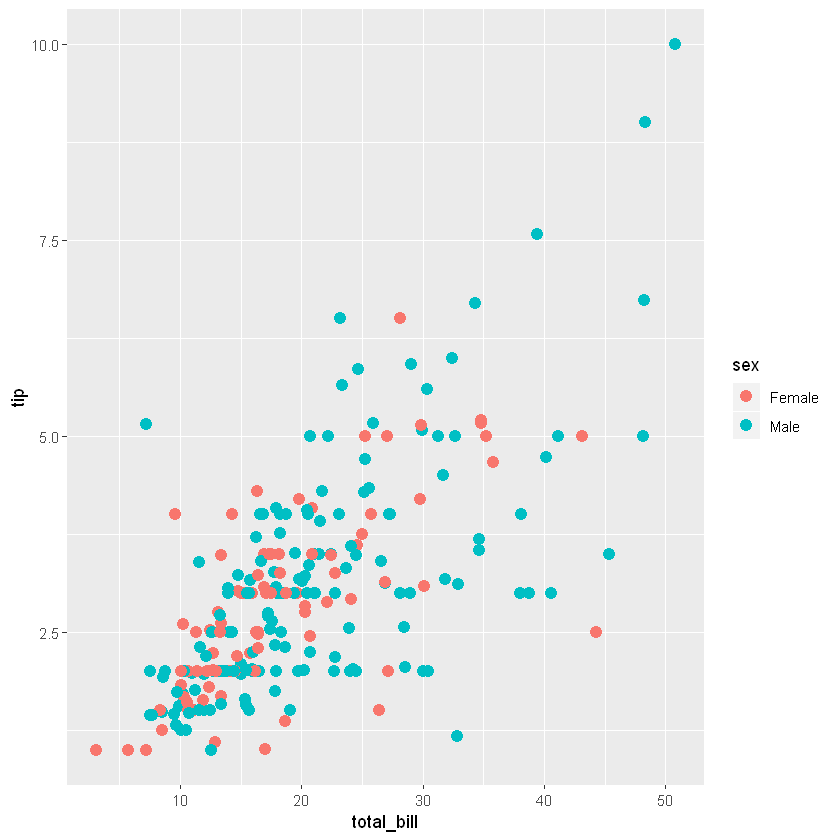

aes {ggplot2},R Documentation
"x, y, ...",List of name value pairs giving aesthetics to map to variables. The names for x and y aesthetics are typically omitted because they are so common; all other aesthetics must be named.


In [37]:
# Camada 1
camada1 <- geom_point(
  mapping = aes(x = total_bill, y = tip, color = sex),
  data = tips,
  size = 3
)
ggplot() + camada1

?aes
??aes

In [38]:
# Contruindo um modelo de regressão
modelo_base <- lm(tip ~ total_bill, data = tips)
modelo_fit <- data.frame(
  total_bill = tips$total_bill, 
  predict(modelo_base, interval = "confidence")
)

head(modelo_fit)

total_bill,fit,lwr,upr
16.99,2.704636,2.569519,2.839753
10.34,2.006223,1.818101,2.194345
21.01,3.126835,2.996732,3.256937
23.68,3.407250,3.266528,3.547972
24.59,3.502822,3.356301,3.649344
25.29,3.576340,3.424725,3.727955


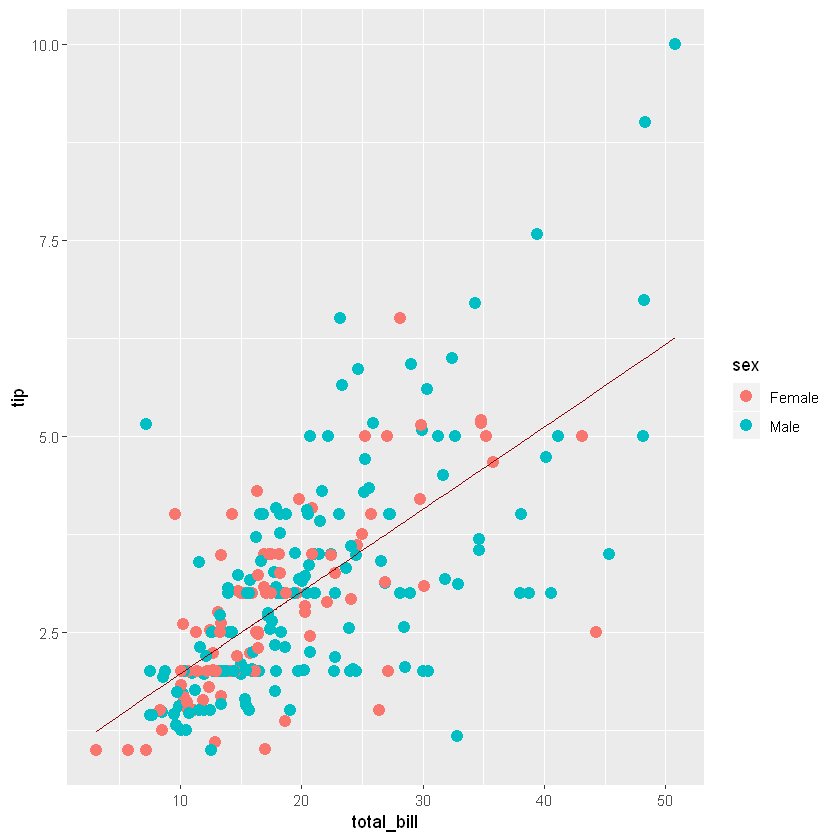

In [39]:
# Camada 2
camada2 <- geom_line(
  mapping = aes(x = total_bill, y = fit),
  data = modelo_fit,
  color = "darkred"
)
ggplot() + camada1 + camada2

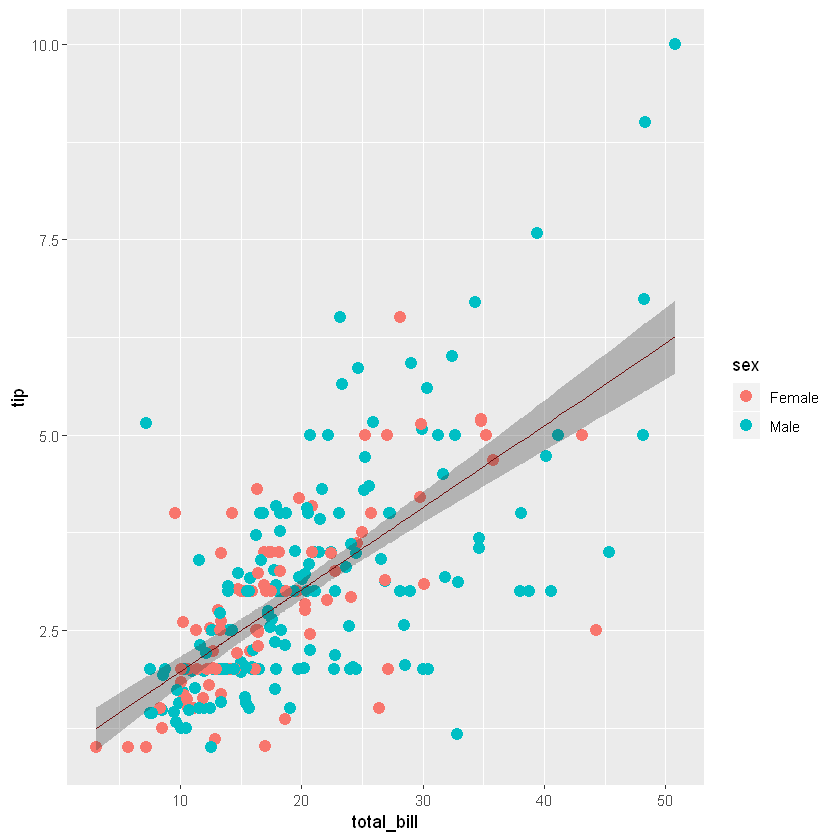

In [40]:
# Camada 3
camada3 <- geom_ribbon(
  mapping = aes(x = total_bill, ymin = lwr, ymax = upr),
  data = modelo_fit,
  alpha = 0.3
)
ggplot() + camada1 + camada2 + camada3

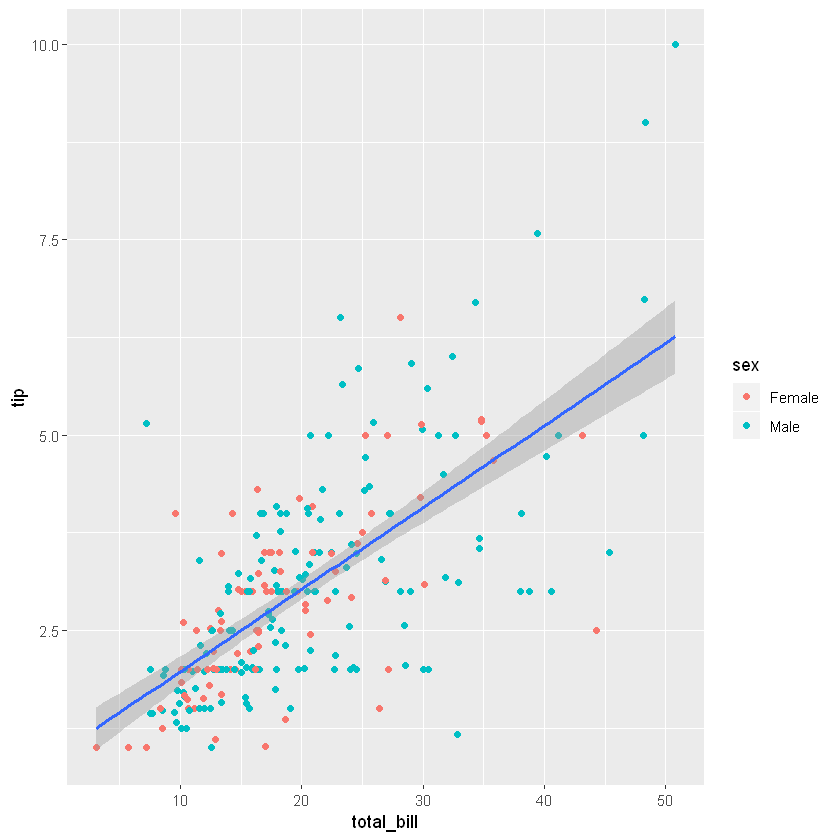

In [41]:
# Versão final otimizada
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point(aes(color = sex)) +
  geom_smooth(method = 'lm')

[1] "gg"     "ggplot"

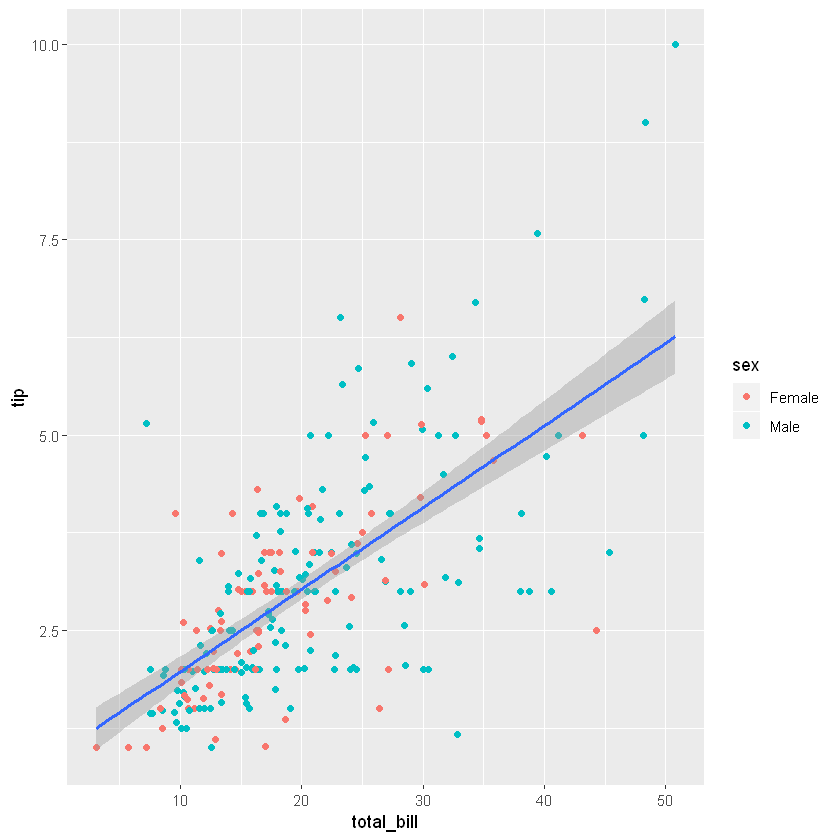

In [42]:
# Gravando o gráfico em um objeto
myplot <- ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point(aes(color = sex)) +
  geom_smooth(method = 'lm')

class(myplot)
print(myplot)

In [43]:
# ScatterPlot com linha de regressão

# Dados
data = data.frame(cond = rep(c("Obs 1", "Obs 2"), 
                           each = 10), var1 = 1:100 + 
                           rnorm(100,sd = 9), var2 = 1:100 + 
                           rnorm(100,sd = 16))

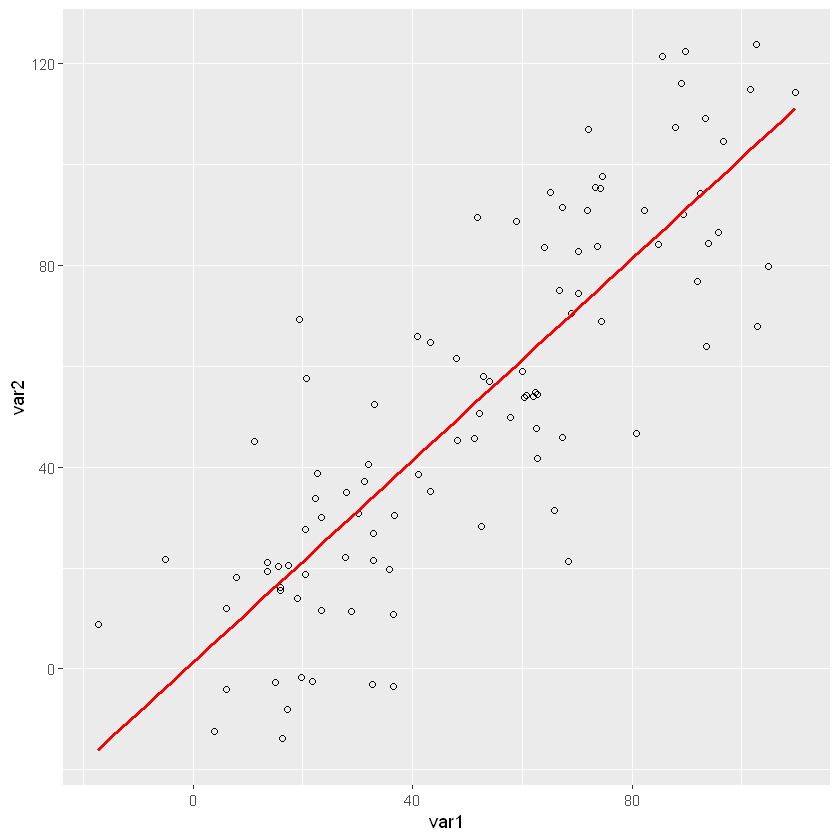

lm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which lm is called."
subset,an optional vector specifying a subset of observations to be used in the fitting process.
weights,"an optional vector of weights to be used in the fitting process. Should be NULL or a numeric vector. If non-NULL, weighted least squares is used with weights weights (that is, minimizing sum(w*e^2)); otherwise ordinary least squares is used. See also ‘Details’,"
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
method,"the method to be used; for fitting, currently only method = ""qr"" is supported; method = ""model.frame"" returns the model frame (the same as with model = TRUE, see below)."
"model, x, y, qr","logicals. If TRUE the corresponding components of the fit (the model frame, the model matrix, the response, the QR decomposition) are returned."
singular.ok,logical. If FALSE (the default in S but not in R) a singular fit is an error.
contrasts,an optional list. See the contrasts.arg of model.matrix.default.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one are specified their sum is used. See model.offset."


In [44]:
# Plot
ggplot(data, aes(x = var1, y = var2)) +    
  geom_point(shape = 1) +  
  geom_smooth(method = lm , color = "red", se = FALSE)  

?lm

In [45]:
# Bar Plot

# Dados
data = data.frame(grupo = c("A ","B ","C ","D ") , 
                  valor = c(33,62,56,67) , 
                  num_obs = c(100,500,459,342))

In [46]:
# Gerando a massa de dados
data$right = cumsum(data$num_obs) + 30 * c(0:(nrow(data)-1))
data$left = data$right - data$num_obs 

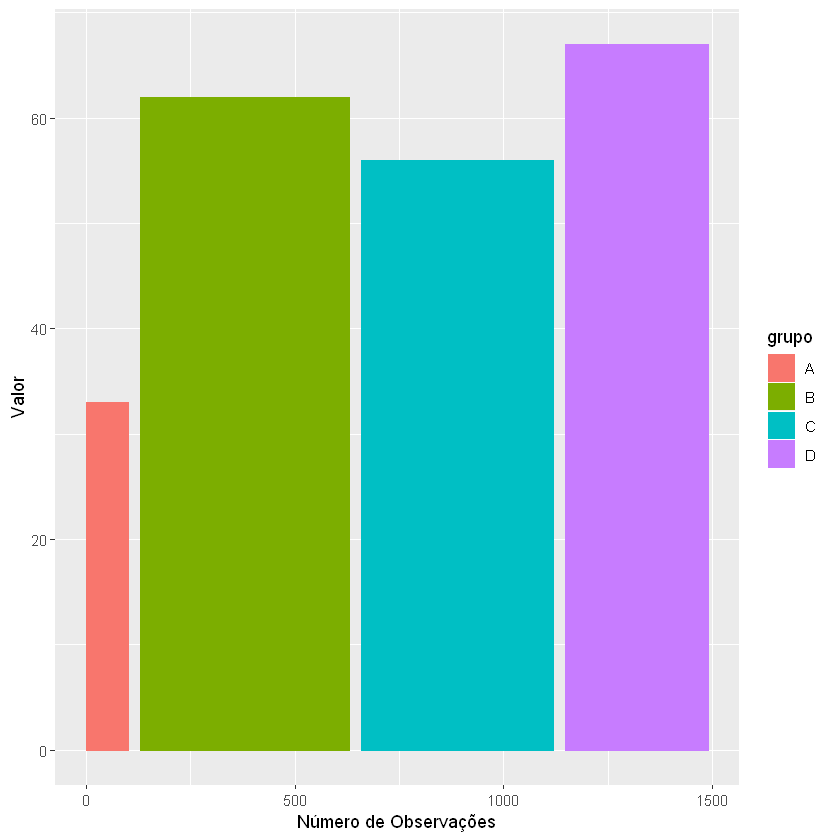

In [47]:
# Plot
ggplot(data, aes(ymin = 0)) + 
    geom_rect(aes(xmin = left, xmax = right, 
                  ymax = valor, colour = grupo, fill = grupo)) +
                  xlab("Número de Observações") + ylab("Valor")

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


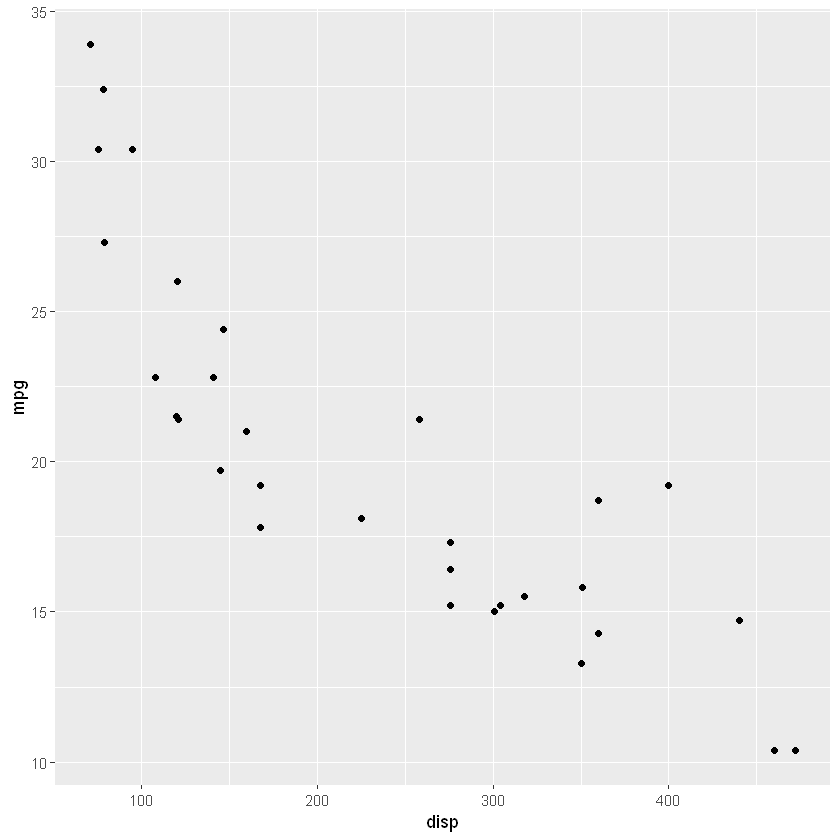

In [48]:
# Usando mtcars

head(mtcars)
ggplot(data = mtcars, aes(x = disp, y = mpg)) + geom_point()

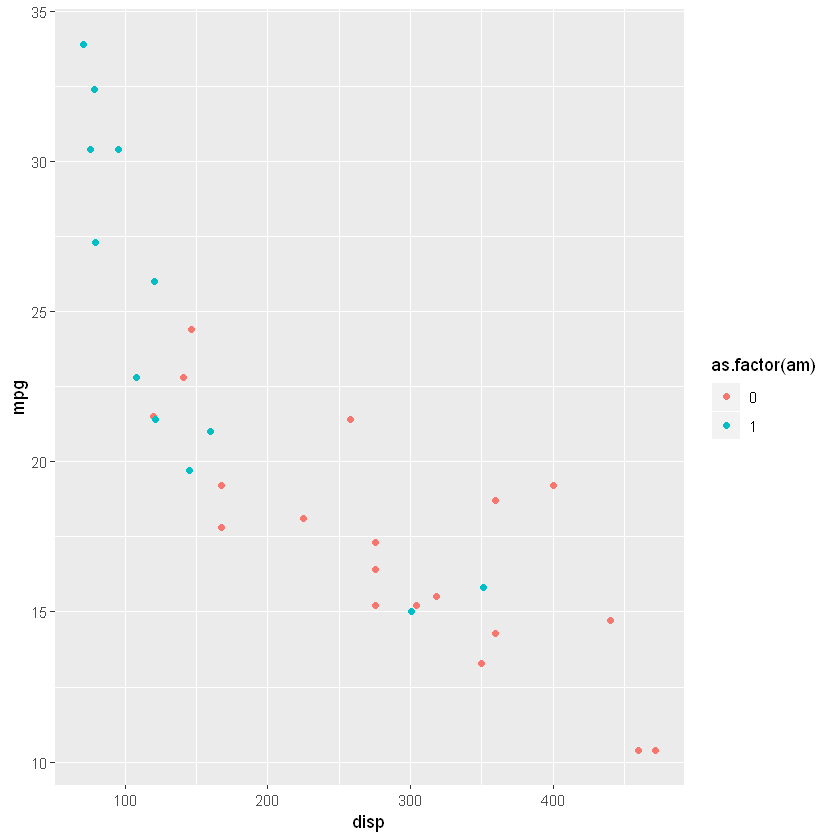

In [49]:
# Outro aspecto que pode ser mapeado nesse gráfico é a cor dos pontos
ggplot(data = mtcars, 
       aes(x = disp, y = mpg, 
           colour = as.factor(am))) + geom_point()

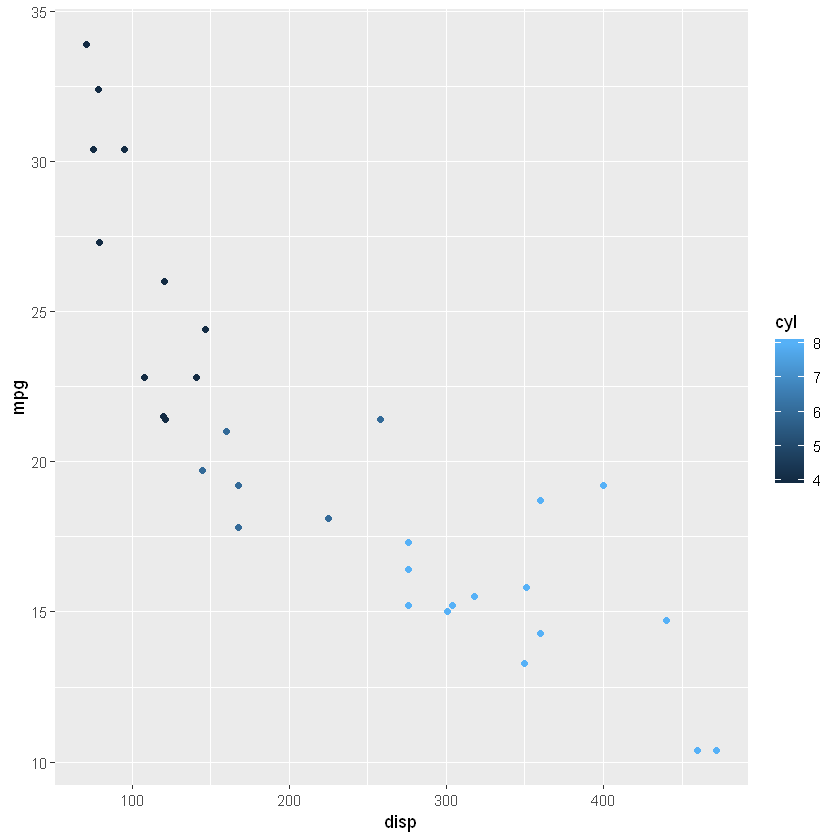

In [50]:
# No entanto, tambem podemos mapear uma variável contínua à cor dos pontos:
#View(mtcars)
ggplot(mtcars, aes(x = disp, y = mpg, colour = cyl)) + geom_point()

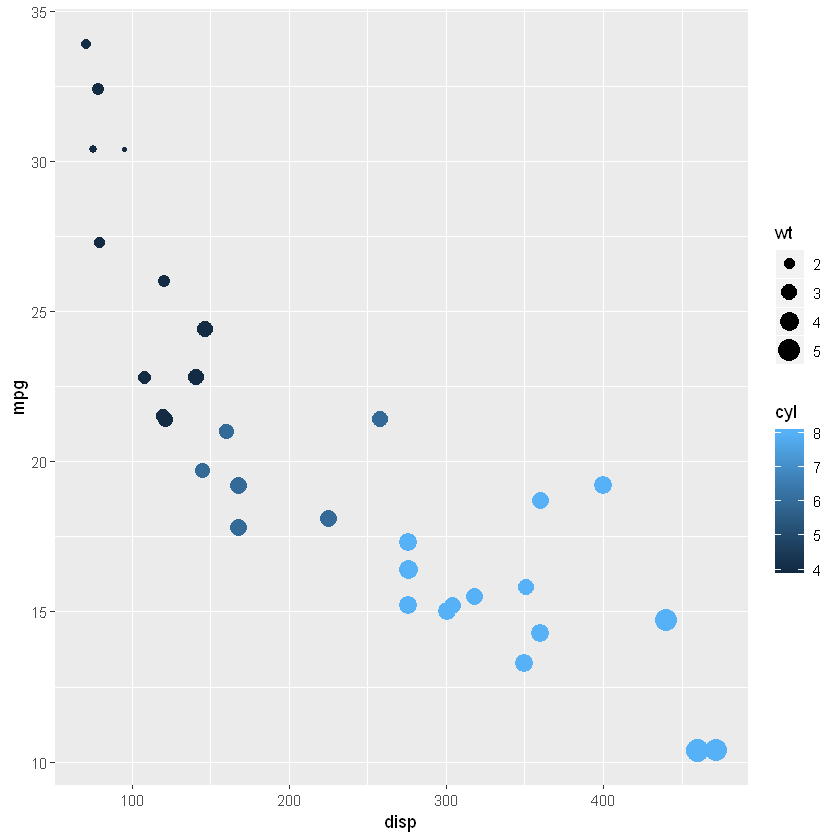

In [51]:
# Também podemos mapear o tamanho dos pontos à uma variável de interesse:
# A legenda é inserida no gráfico automaticamente
ggplot(mtcars, aes(x = disp, y = mpg, colour = cyl, size = wt)) + geom_point()

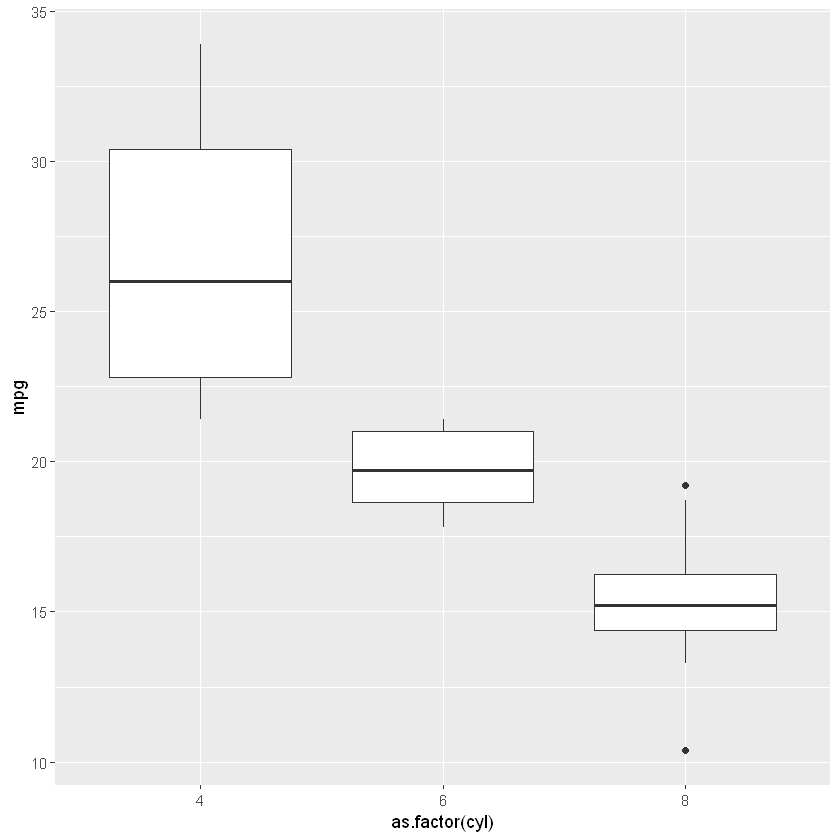

In [52]:
# Os geoms definem qual forma geométrica será utilizada para a visualização dos dados no gráfico. 
ggplot(mtcars, aes(x = as.factor(cyl), y = mpg)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


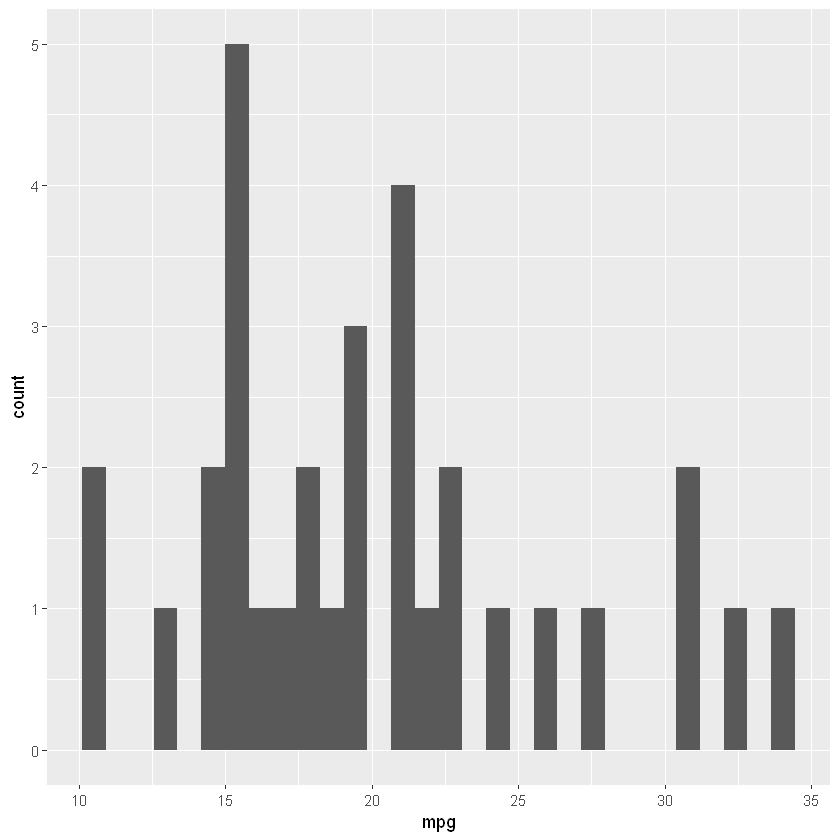

In [53]:
# Histogramas
ggplot(mtcars, aes(x = mpg), binwidth = 30) + geom_histogram()

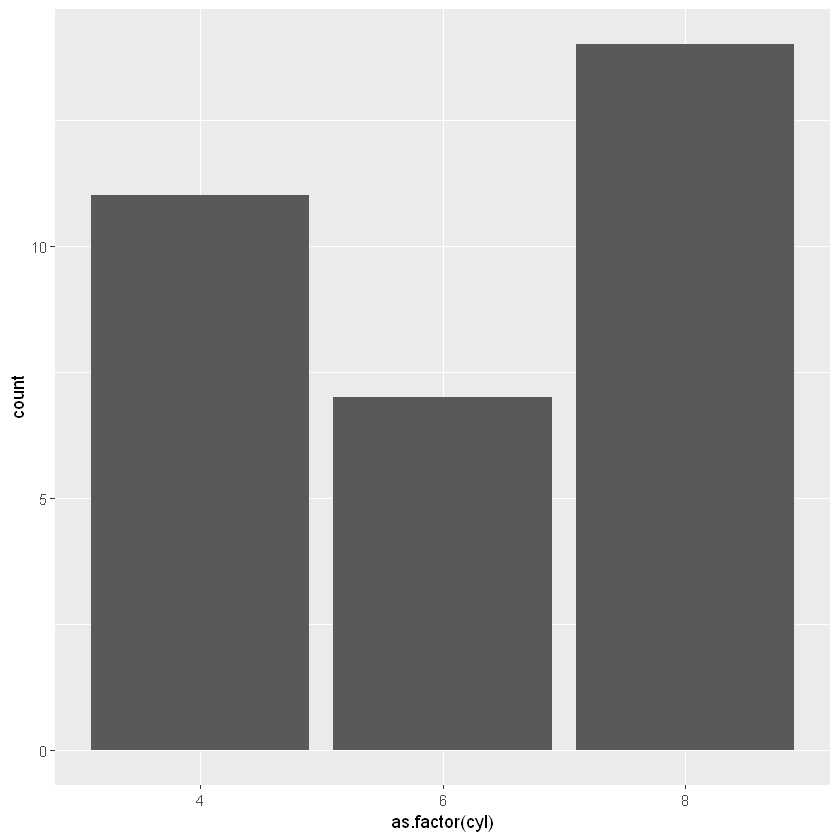

In [54]:
# Gráfico de Barras
ggplot(mtcars, aes(x = as.factor(cyl))) + geom_bar()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

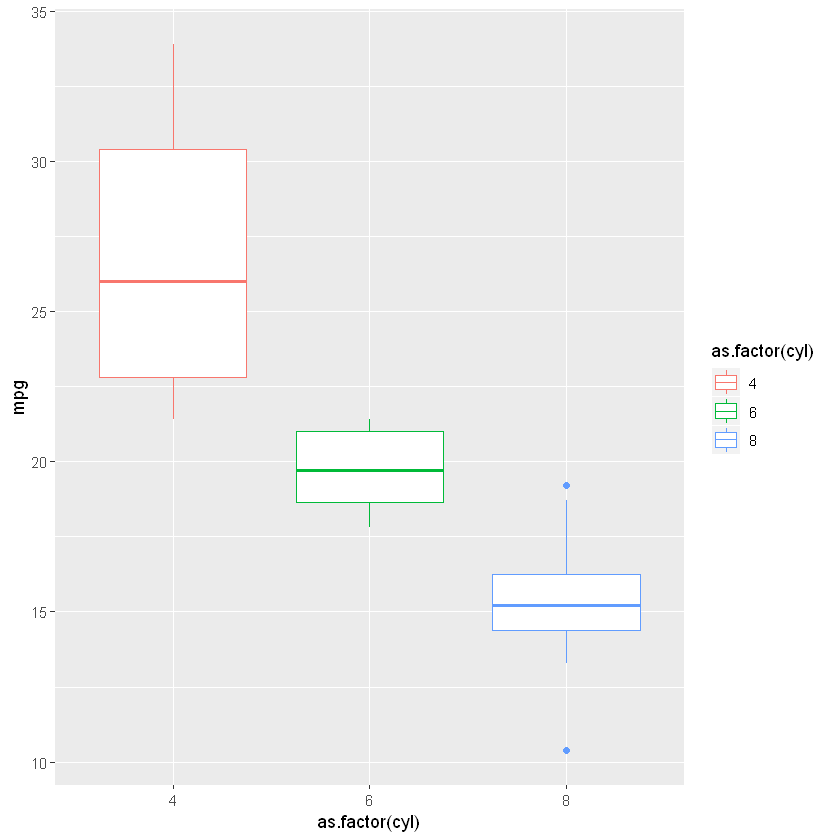

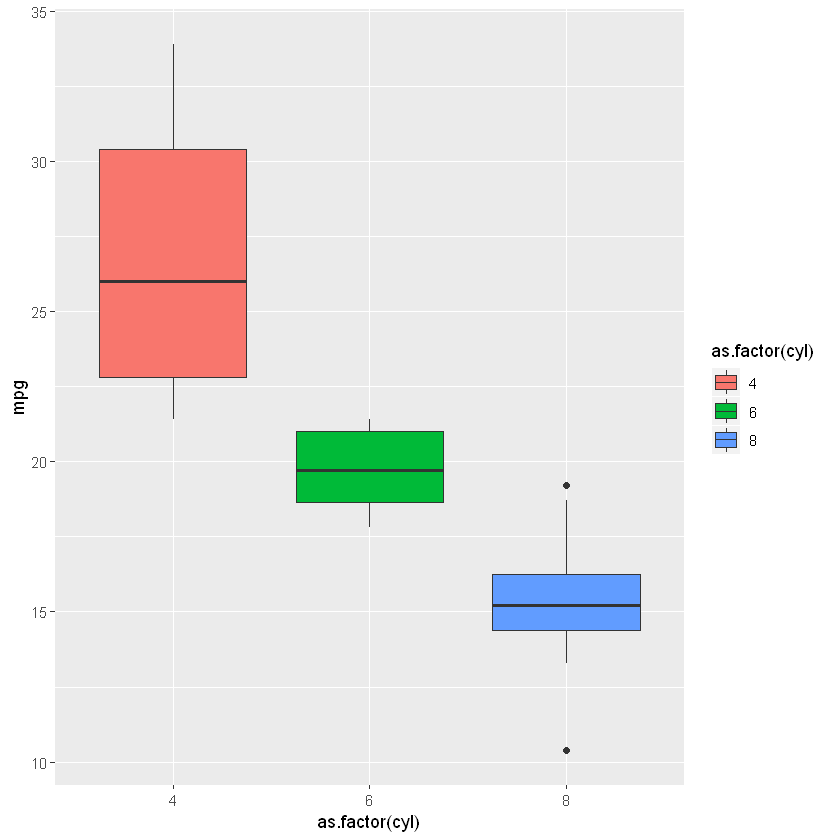

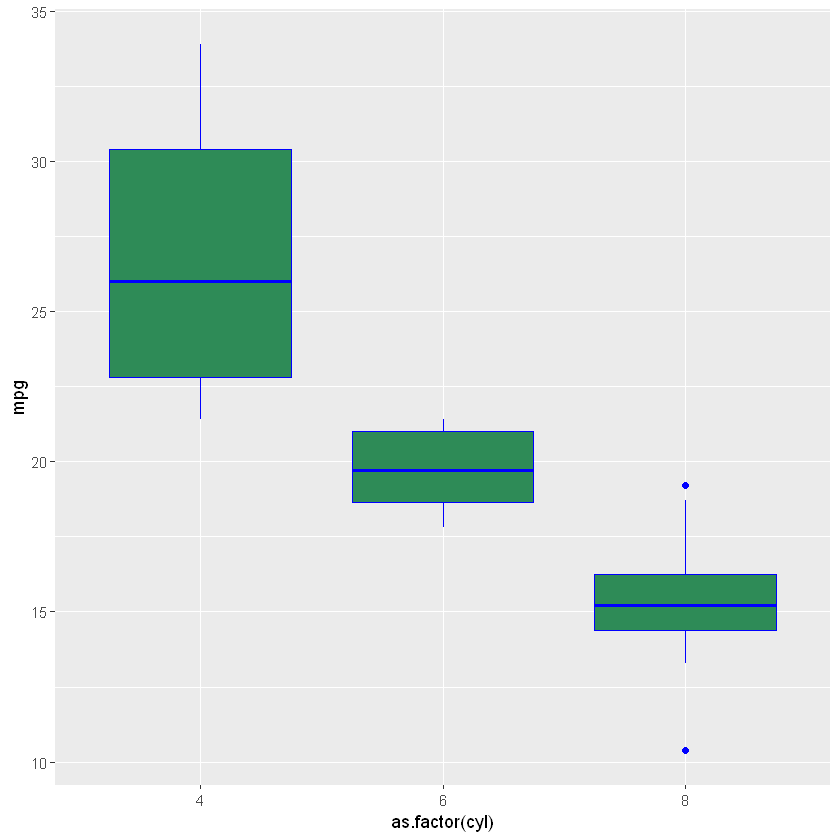

In [55]:
# Personalizando os gráficos
colors()

ggplot(mtcars, aes(x = as.factor(cyl), y = mpg, 
                   colour = as.factor(cyl))) + geom_boxplot()

ggplot(mtcars, aes(x = as.factor(cyl), y = mpg, 
                   fill = as.factor(cyl))) + geom_boxplot()

ggplot(mtcars, 
       aes(x = as.factor(cyl), y = mpg)) + 
  geom_boxplot(color = "blue", fill = "seagreen4")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


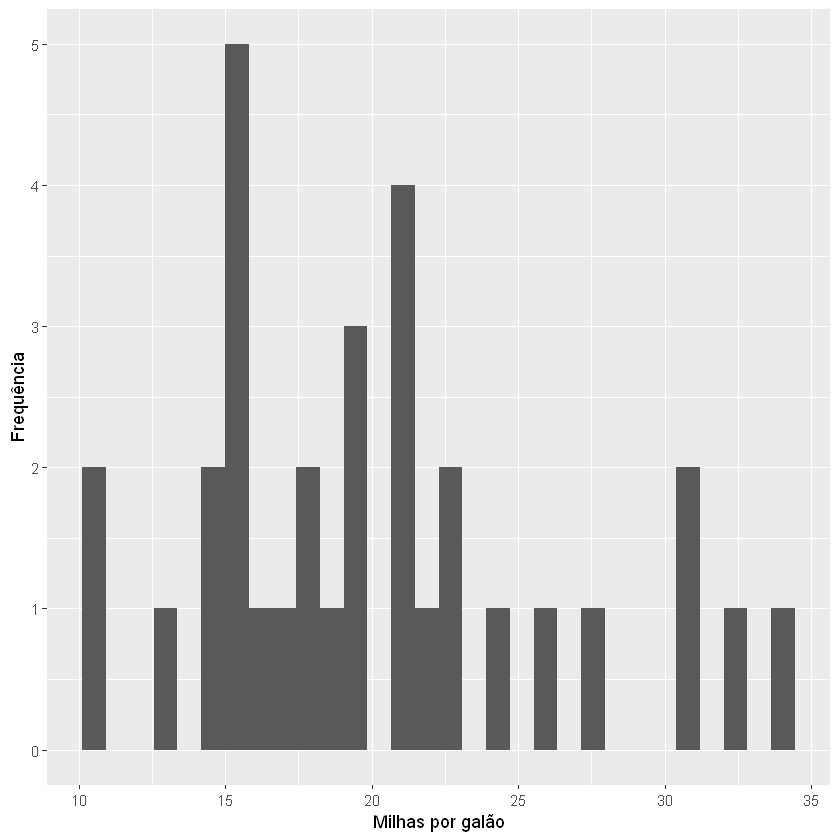

In [56]:
# Podemos alterar os eixos
ggplot(mtcars, aes(x = mpg)) + 
  geom_histogram() + 
  xlab("Milhas por galão") + ylab("Frequência")

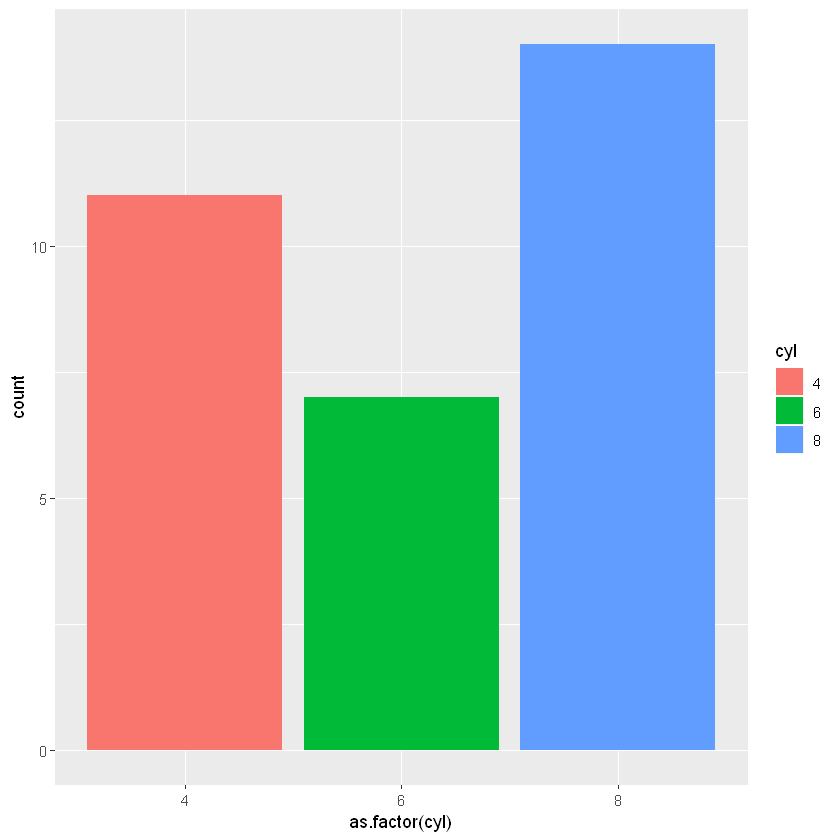

In [57]:
# Legendas
ggplot(mtcars, aes(x = as.factor(cyl), fill = as.factor(cyl))) + 
  geom_bar() +
  labs(fill = "cyl")

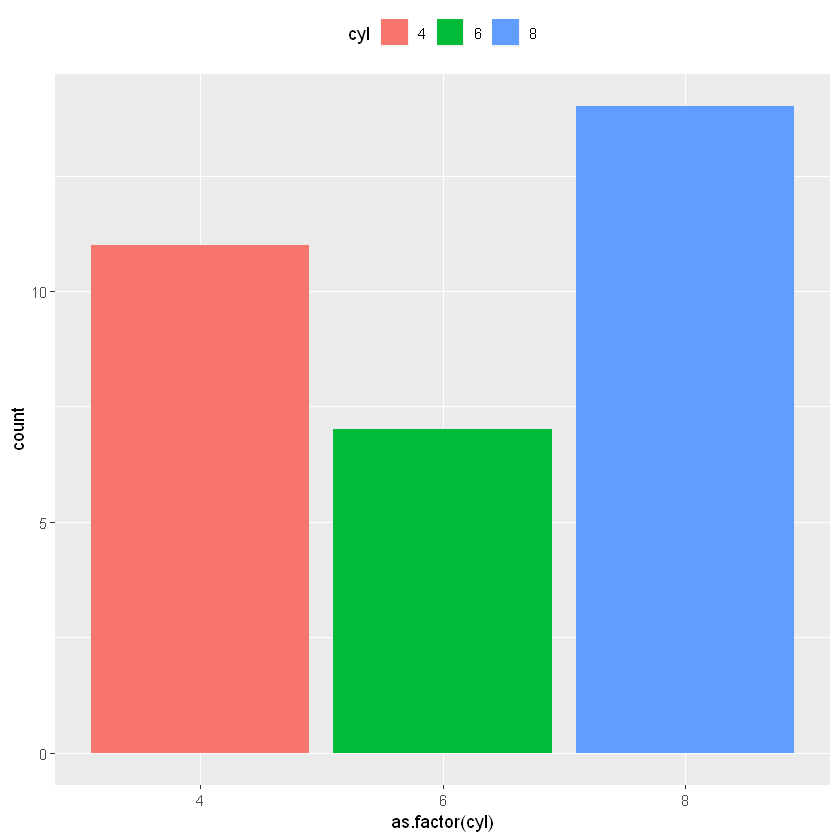

In [58]:
# Trocando a posição da legenda
ggplot(mtcars, aes(x = as.factor(cyl), fill = as.factor(cyl))) + 
  geom_bar() +
  labs(fill = "cyl") +
  theme(legend.position = "top")

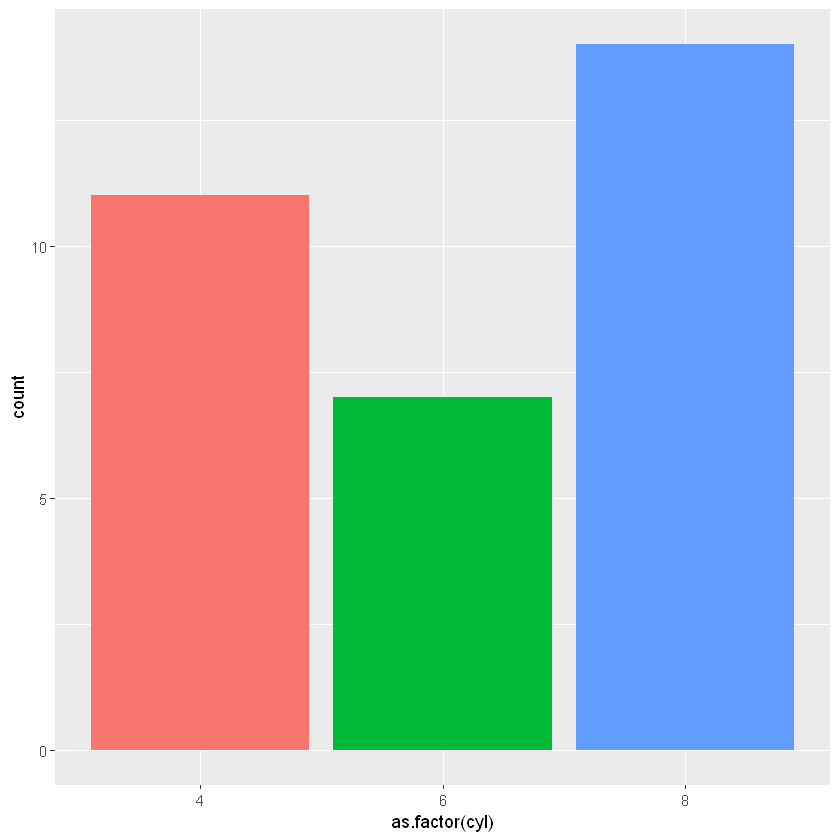

In [59]:
# Sem legenda
ggplot(mtcars, aes(x = as.factor(cyl), fill = as.factor(cyl))) + 
  geom_bar() +
  guides(fill = FALSE)

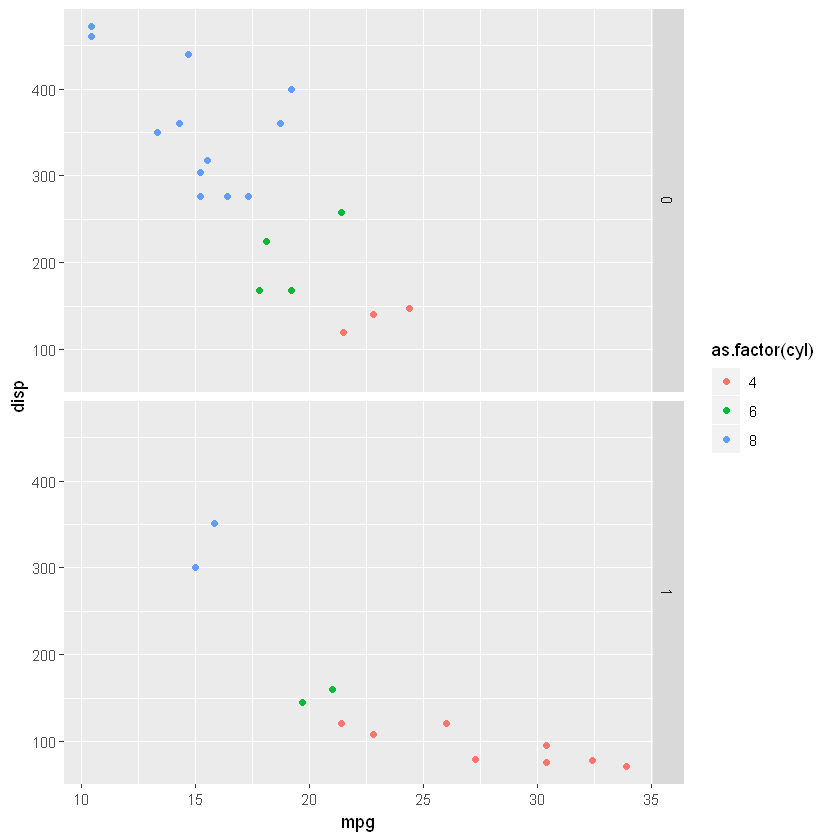

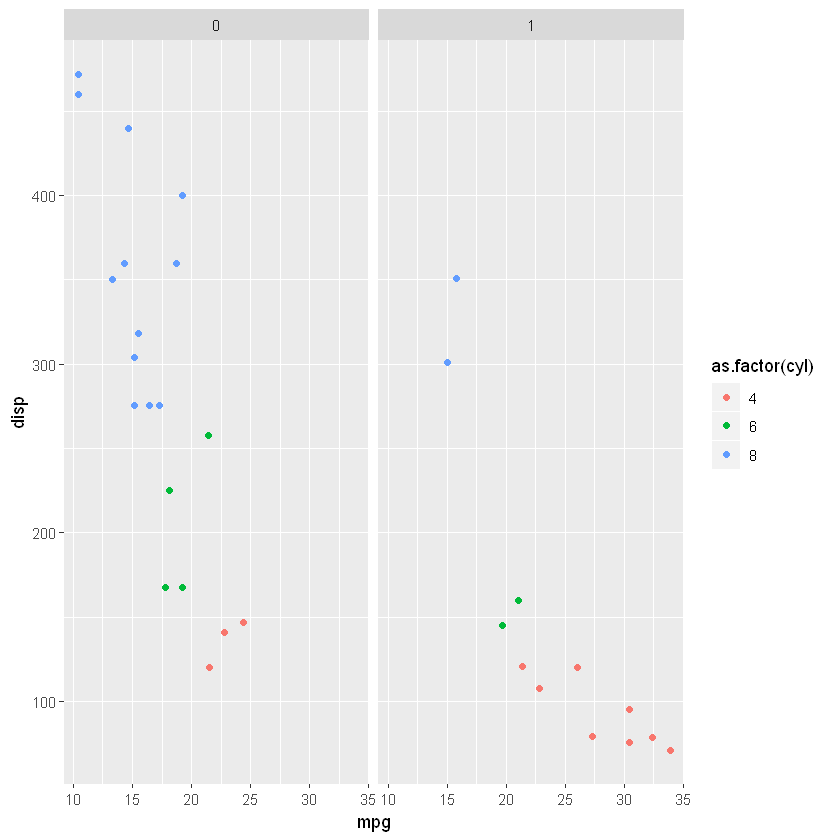

In [60]:
# Facets
ggplot(mtcars, aes(x = mpg, y = disp, colour = as.factor(cyl))) + 
  geom_point() + 
  facet_grid(am~.)

ggplot(mtcars, aes(x = mpg, y = disp, colour = as.factor(cyl))) +
  geom_point() + 
  facet_grid(.~am)

In [62]:
# Plots diferentes juntos (diferente de Facet)
#install.packages("gridExtra")
library(gridExtra)
library(ggplot2)

ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


In [63]:
# Dataset diamonds
data(diamonds)

In [64]:
# Histograma como plot1
plot1 <- qplot(price, data = diamonds, binwidth = 1000)

In [65]:
# ScatterPlot como plot2
plot2 <- qplot(carat, price, data = diamonds, colour = cut)

In [66]:
# Combina os 2 plots na mesma área
grid.arrange(plot1, plot2, ncol = 1)

ERROR: Error in grid.arrange(plot1, plot2, ncol = 1): não foi possível encontrar a função "grid.arrange"


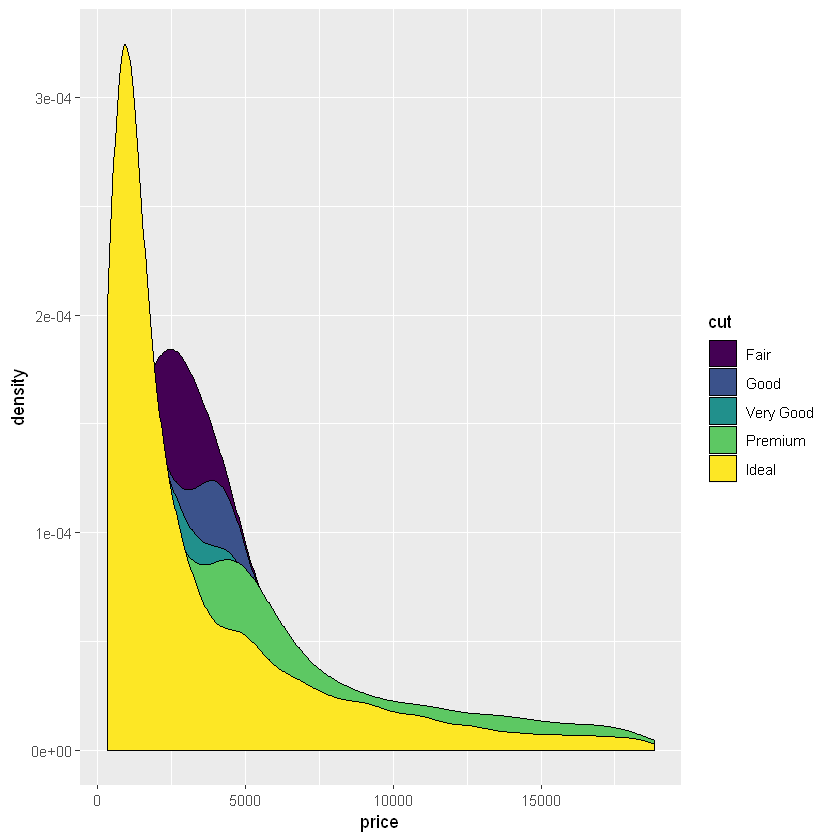

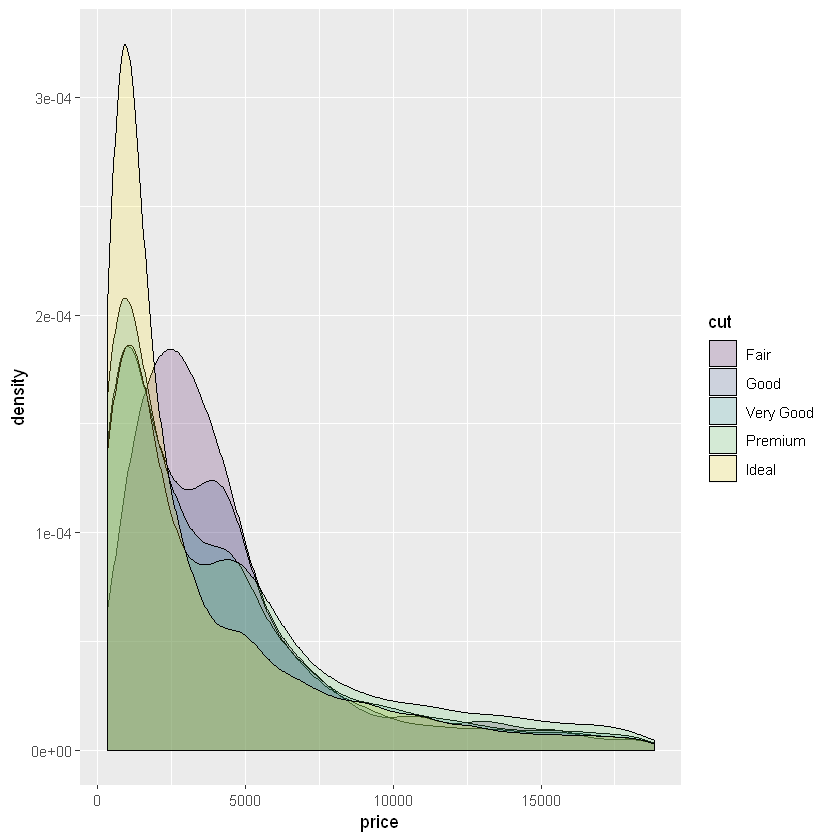

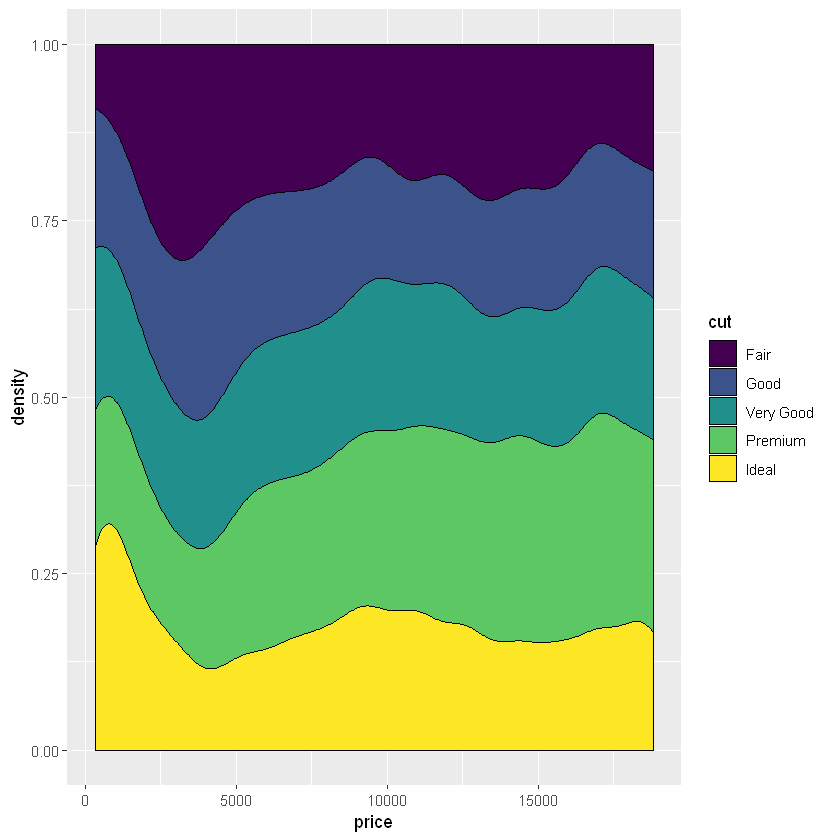

In [67]:
# Gráficos de Densidade

ggplot(data = diamonds, aes(x = price, group = cut, fill = cut)) + 
    geom_density(adjust = 1.5)
 
ggplot(data = diamonds, aes(x = price, group = cut, fill = cut)) + 
    geom_density(adjust = 1.5 , alpha = 0.2)
 
ggplot(data = diamonds,aes(x = price, group = cut, fill = cut)) + 
    geom_density(adjust = 1.5, position = "fill")

In [68]:
# Facets com reshape
#install.packages("reshape2")
#install.packages("plotly")
library(reshape2)
library(plotly)

sp <- ggplot(tips, aes(x = total_bill, y = tip/total_bill)) + geom_point(shape = 1)
sp + facet_grid(sex ~ .)
ggplotly()
sp + facet_grid(. ~ sex)
ggplotly()
sp + facet_wrap( ~ day, ncol = 2)
ggplotly()


ggplot(mpg, aes(displ, hwy)) + geom_point() + facet_wrap(~manufacturer)
ggplotly()


ERROR: Error in library(plotly): there is no package called 'plotly'
